In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import os
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, Conv3D, TimeDistributed, Dropout, Flatten, MaxPooling2D, MaxPool3D, Reshape, LSTM, Bidirectional
from keras import regularizers

Using TensorFlow backend.


In [70]:
def load_data(x_folder,y_folder,start,end):
    x_data=[];
    x_paths=[];
    y_data=None;
    for i in range(start,51):
        src='lec'+str(i);
        image_folder=x_folder+src;
        #for img in sorted(os.listdir(image_folder)):
        for j in range(1, len(os.listdir(image_folder)) + 1):
            img = 'slide'+str(j)+'.jpg'
            image=cv2.resize(cv2.imread(os.path.join(image_folder,img)),(224,224));
            x_data.append(image);
            x_paths.append(str(os.path.join(image_folder,img)));

        label=np.loadtxt((y_folder+src+'.csv'),dtype=int);
        y_data = np.concatenate([y_data, label]) if y_data is not None else label;
        print(src+"loaded");
        if i==end:
            break;
    return np.array(x_data),np.array(y_data),x_paths;

In [60]:
def format_data(in_x,in_y,index,timestep,batch_size):
    total_samples=in_x.shape[0];
    dim=(batch_size,timestep,in_x.shape[1],in_x.shape[2],in_x.shape[3])
    print(dim)
    x_train=np.zeros(batch_size*timestep*in_x.shape[1]*in_x.shape[2]*in_x.shape[3]).reshape(*dim);
    #x_train = np.zeros(dim)
    y_train=np.zeros(batch_size);
    
    offset=int(timestep/2);
    print('offset= '+str(offset));
    for i in range(dim[0]):
        x_train[i]=in_x[i+(index*batch_size):i+(index*batch_size)+timestep];
        y_train[i]=in_y[i+(index*batch_size)+offset];
    print(x_train.shape);
    print(y_train.shape);
    return x_train,y_train;

In [85]:
def getmodel(timesteps):
    model=Sequential();
    model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'),input_shape=(timesteps,224, 224, 3)));
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))));
    model.add(TimeDistributed(Conv2D(32, (3, 3),activation='relu',kernel_regularizer = regularizers.l2('0.5'))));
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Conv2D(64, (3, 3),activation='relu',kernel_regularizer = regularizers.l2('0.5'))));
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Conv2D(128, (3, 3),activation='relu',kernel_regularizer = regularizers.l2('0.5'))));
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Conv2D(64, (3, 3),activation='relu',kernel_regularizer = regularizers.l2('0.5'))));
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))));
    model.add(TimeDistributed(Flatten()));
    #model.add(Bidirectional(LSTM(32,activation='tanh',return_sequences=False, kernel_regularizer=regularizers.l2('0.5')),merge_mode='concat'));
    model.add(Dense(1,activation='sigmoid'));
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']);
    model.summary();
    return model;

timesteps=20;
lrcn=getmodel(timesteps);


TypeError: sigmoid_cross_entropy_with_logits() got an unexpected keyword argument 'labels'

In [71]:
x_folder='slides/';
y_folder='labels/';
print("loading data");
x_data,y_data,x_paths=load_data(x_folder,y_folder,21,21);
x_data = x_data[...,::-1]; ## BGR to RGB
print("data loaded");

loading data
lec21loaded
data loaded


In [79]:
timesteps=20;
lrcn=getmodel(timesteps);
total_samples=x_data.shape[0];
iter=total_samples-timesteps;
batch_size=32;
epochs=2;
for e in range(epochs):
    for i in range(iter/batch_size):
        x_train, y_train= format_data(x_data,y_data,i,timesteps,batch_size);
        print('training on batch '+str(i)+' for epoch number '+str(e))
        lrcn.train_on_batch(x_train,y_train);

x_t,y_t,x_tpaths=load_data(x_folder,y_folder,26,26);
x_test,y_test=format_data(x_t,y_t,20);
y_pred=lrcn.predict(x_test,batch_size=32);
print(y_pred);
np.savetxt('y.csv',y_pred,delimiter=',',fmt='%.6f')


TypeError: Expected int32, got list containing Tensors of type '_Message' instead.

In [15]:
np.where(y_data==1)

(array([  26,   38,   73,  139,  143,  186,  193,  197,  204,  211,  267,
         275,  288,  303,  316,  363,  365,  386,  390,  446,  447,  455,
         457,  485,  511,  531,  547,  562,  573,  574,  577,  618,  620,
         624,  634,  727,  738,  741,  783,  786,  792,  818,  846,  899,
         902,  903,  972,  983,  984, 1055, 1059, 1108, 1146, 1149, 1158,
        1161, 1257, 1342, 1357, 1359, 1400, 1403, 1419, 1420, 1422, 1436,
        1437, 1508, 1570, 1573, 1645, 1670, 1672, 1676, 1689, 1719, 1763,
        1809, 1811, 1860, 1864, 1938, 1970, 1973, 2037, 2040, 2060, 2109,
        2115, 2176, 2181, 2267, 2269, 2389, 2391, 2393, 2408, 2411, 2414,
        2420, 2492, 2496, 2548, 2561, 2635, 2699, 2702, 2705, 2709, 2719,
        2736, 2749, 2761, 2791, 2809, 2823, 2832, 2843, 2852, 2854, 2887,
        2899, 2931, 2943, 2961, 2971, 2984, 2988, 2993, 2999, 3014, 3017,
        3041, 3053, 3066, 3095, 3105, 3159, 3191, 3220, 3221, 3225, 3231,
        3241, 3242, 3252, 3264, 3272, 

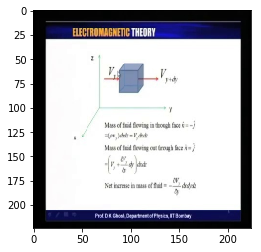

In [41]:
plt.imshow(x_data[y_data==1][0])

0


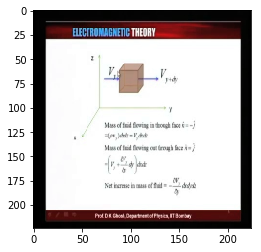

1


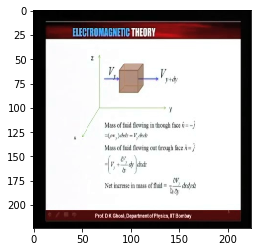

2


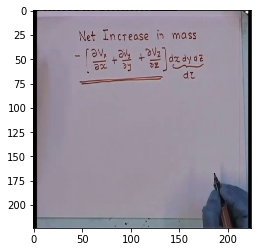

3


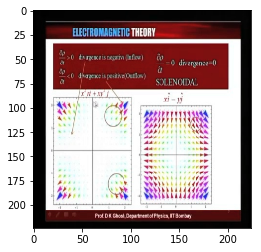

4


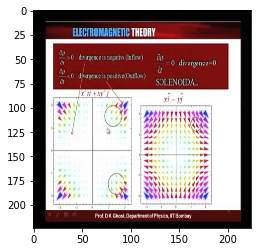

5


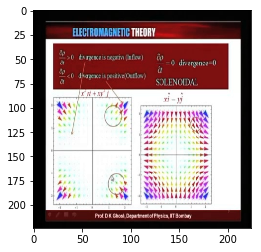

6


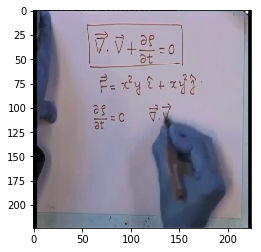

7


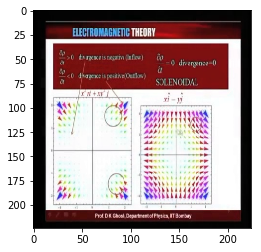

8


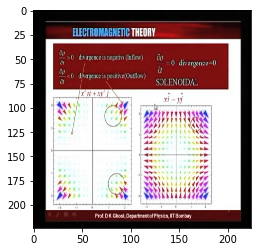

9


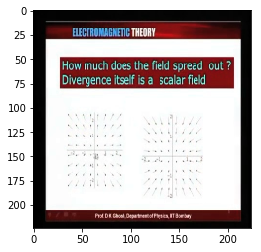

10


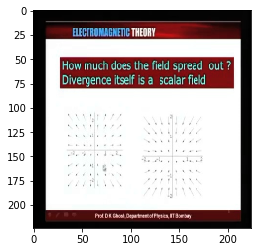

11


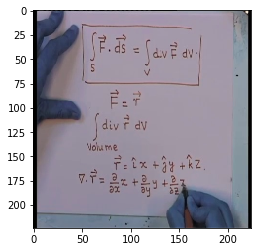

12


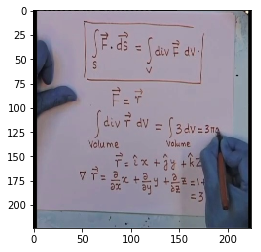

13


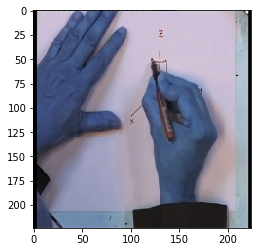

14


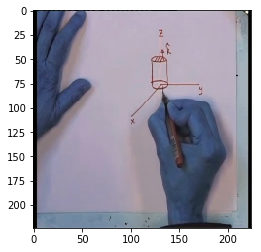

15


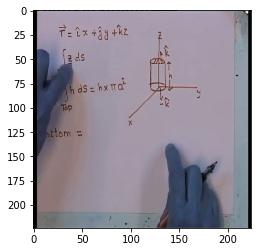

16


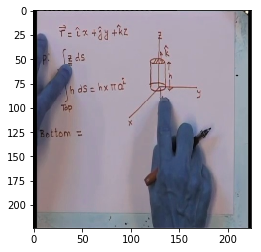

17


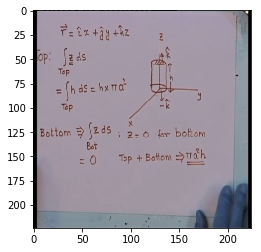

18


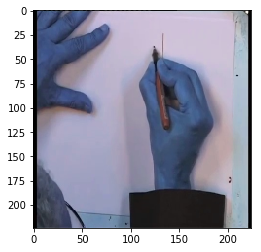

19


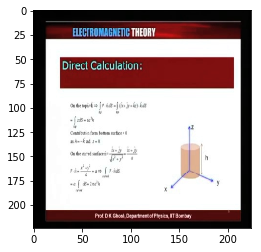

20


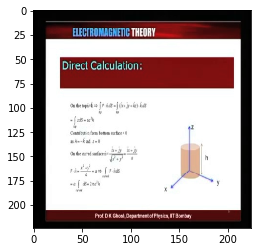

21


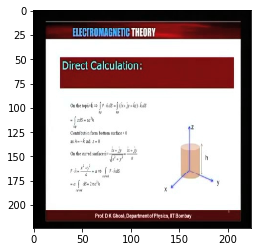

22


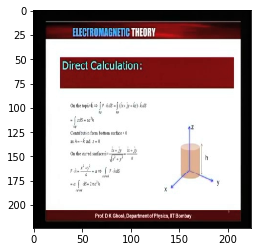

23


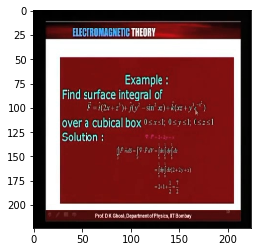

24


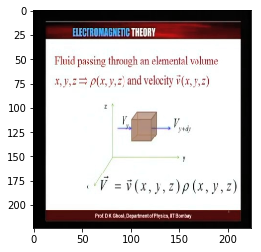

25


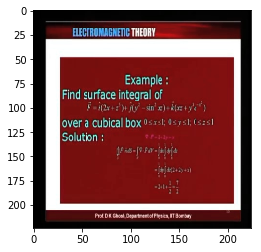

26


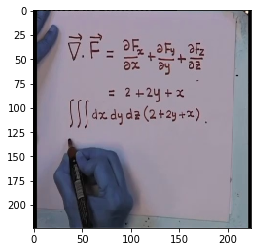

27


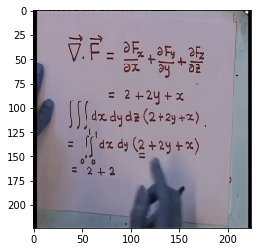

28


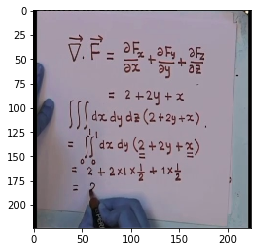

29


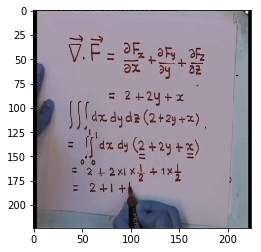

30


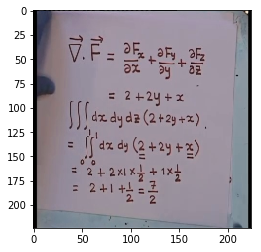

31


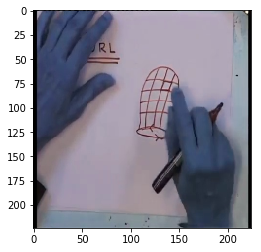

32


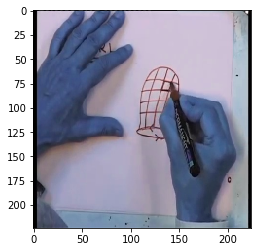

33


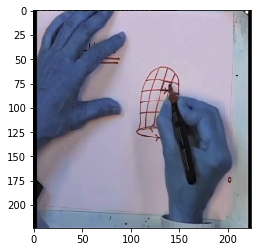

34


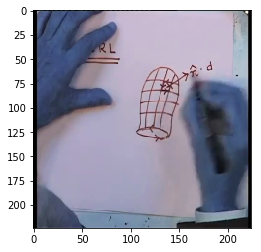

35


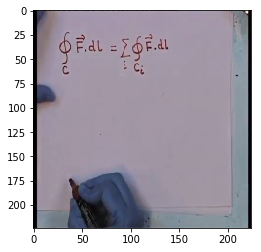

36


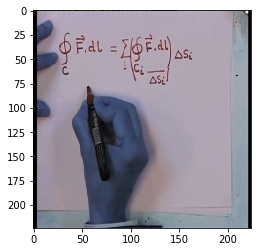

37


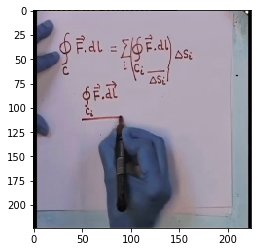

38


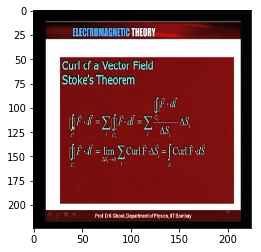

39


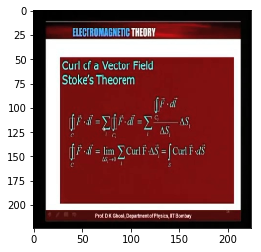

40


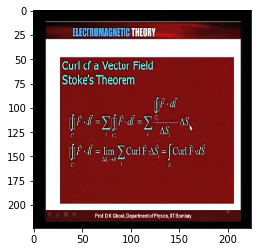

41


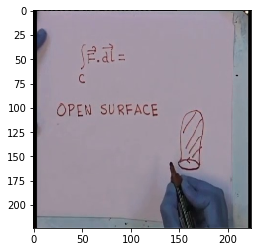

42


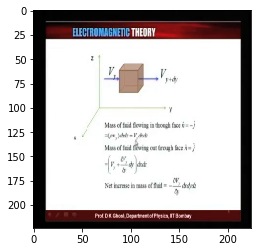

In [21]:

for i in range(43):
    print(i)
    plt.imshow(x_data[y_data==1][i])
    plt.show()

In [23]:
np.where(y_data==1)

(array([ 26,  38,  73, 139, 143, 186, 193, 197, 204, 211, 267, 275, 288,
        303, 316, 363, 365, 386, 390, 446, 447, 455, 457, 485, 511, 531,
        547, 562, 573, 574, 577, 618, 620, 624, 634, 727, 738, 741, 783,
        786, 792, 818, 846]),)

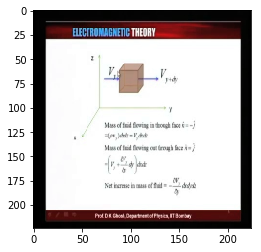

In [8]:
np.where(y_data==1)

(array([  26,   38,   73,  139,  143,  186,  193,  197,  204,  211,  267,
         275,  288,  303,  316,  363,  365,  386,  390,  446,  447,  455,
         457,  485,  511,  531,  547,  562,  573,  574,  577,  618,  620,
         624,  634,  727,  738,  741,  783,  786,  792,  818,  846,  899,
         902,  903,  972,  983,  984, 1055, 1059, 1108, 1146, 1149, 1158,
        1161, 1257, 1342, 1357, 1359, 1400, 1403, 1419, 1420, 1422, 1436,
        1437, 1508, 1570, 1573, 1645, 1670, 1672, 1676, 1689, 1719, 1763,
        1809, 1811, 1860, 1864, 1938, 1970, 1973, 2037, 2040, 2060, 2109,
        2115, 2176, 2181, 2267, 2269, 2389, 2391, 2393, 2408, 2411, 2414,
        2420, 2492, 2496, 2548, 2561, 2635, 2699, 2702, 2705, 2709, 2719,
        2736, 2749, 2761, 2791, 2809, 2823, 2832, 2843, 2852, 2854, 2887,
        2899, 2931, 2943, 2961, 2971, 2984, 2988, 2993, 2999, 3014, 3017,
        3041, 3053, 3066, 3095, 3105, 3159, 3191, 3220, 3221, 3225, 3231,
        3241, 3242, 3252, 3264, 3272, 

In [53]:
len(os.listdir('slides/lec22/'))

963

In [76]:
np.zeros((1,2,3,4,5)).shape

(1, 2, 3, 4, 5)